Here I copy some code locally to my google colab in order to avoid checksum error

In [0]:
! git clone https://github.com/tensorflow/datasets.git
%cd datasets

fatal: destination path 'datasets' already exists and is not an empty directory.
/content/datasets


Here I download the Oxford Flowers dataset

In [0]:
! python -m tensorflow_datasets.scripts.download_and_prepare --register_checksums --datasets=oxford_flowers102

2020-05-11 02:35:16.210059: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
I0511 02:35:18.554568 140063649589120 download_and_prepare.py:197] Running download_and_prepare for dataset(s):
oxford_flowers102
I0511 02:35:18.556413 140063649589120 dataset_info.py:358] Load dataset info from /root/tensorflow_datasets/oxford_flowers102/2.1.1
I0511 02:35:18.563513 140063649589120 download_and_prepare.py:135] download_and_prepare for dataset oxford_flowers102/2.1.1...
I0511 02:35:18.563952 140063649589120 dataset_builder.py:282] Reusing dataset oxford_flowers102 (/root/tensorflow_datasets/oxford_flowers102/2.1.1)
name: "oxford_flowers102"
description: "The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring\nin the United Kingdom. Each class consists of between 40 and 258 images. The images have\nlarge scale, pose and light variations. In addition, there are categories that have large\nvari

In [0]:
#Just checking that it indeed got downloaded
ls /root/tensorflow_datasets/oxford_flowers102/2.1.1

dataset_info.json
image.image.json
label.labels.txt
oxford_flowers102-test.tfrecord-00000-of-00002
oxford_flowers102-test.tfrecord-00001-of-00002
oxford_flowers102-train.tfrecord-00000-of-00001
oxford_flowers102-validation.tfrecord-00000-of-00001


**Please note below that I read the Flowers dataset directly from my google colab, that's why download=False**
You might not need to do this for other datasets. In this case, please skip all cells above and change to download=True.

Please not that I only read 10% of the test set. You can try to that with other datasets as well. I think you can increase this percentage slightly and still will be OK in terms of memory. Then you can use all code from previous labs.

In [0]:
#Here we import libraries nessesary to work with tensorflow datasets
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

#Here we load the training part of the dataset and save the images to x_train and labels to y_train

flowers_train = tfds.load('oxford_flowers102', split='train',download=False,batch_size=-1)
flowers_train = tfds.as_numpy(flowers_train) 
x_train, y_train = flowers_train["image"], flowers_train["label"] # seperate the x and y

#Here we load the validation part of the dataset and save the images to x_validation and labels to y_validation

flowers_validation = tfds.load('oxford_flowers102', split='validation',download=False,batch_size=-1)
flowers_validation = tfds.as_numpy(flowers_validation) 
x_validation, y_validation = flowers_validation["image"], flowers_validation["label"] # seperate the x and y

#Here we load a small  part (10%) of the flowerds test dataset and save the images to x_test and labels to y_test

flowers_test = tfds.load('oxford_flowers102', split='validation[:10%]',download=False,batch_size=-1)
flowers_test = tfds.as_numpy(flowers_test) 
x_test, y_test = flowers_test["image"], flowers_test["label"] # seperate the x and y

Here we plot one flower from the test set

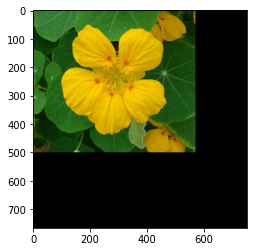

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])